                             open    high   close     low   volumn  \
date                                                                 
2021-07-01 06:00:00+07:00  143.51  144.62  144.26  143.13  16474.0   
2021-07-01 05:00:00+07:00  143.25  144.41  143.50  142.39  22183.4   
2021-07-01 04:00:00+07:00  142.16  143.86  143.25  142.14  23128.0   
2021-07-01 03:00:00+07:00  141.63  142.91  142.16  140.70  32348.9   
2021-07-01 02:00:00+07:00  140.83  141.76  141.55  140.33  21511.3   
...                           ...     ...     ...     ...      ...   
2021-06-01 11:00:00+07:00  182.89  184.66  183.24  182.03  46099.0   
2021-06-01 10:00:00+07:00  183.88  185.35  182.89  181.00  48139.9   
2021-06-01 09:00:00+07:00  186.44  187.64  183.87  182.39  64725.3   
2021-06-01 08:00:00+07:00  192.38  192.38  186.44  186.24  52564.2   
2021-06-01 07:00:00+07:00  188.01  193.16  192.38  187.00  74476.2   

                           hour_return         day  hour  type  \
date                   

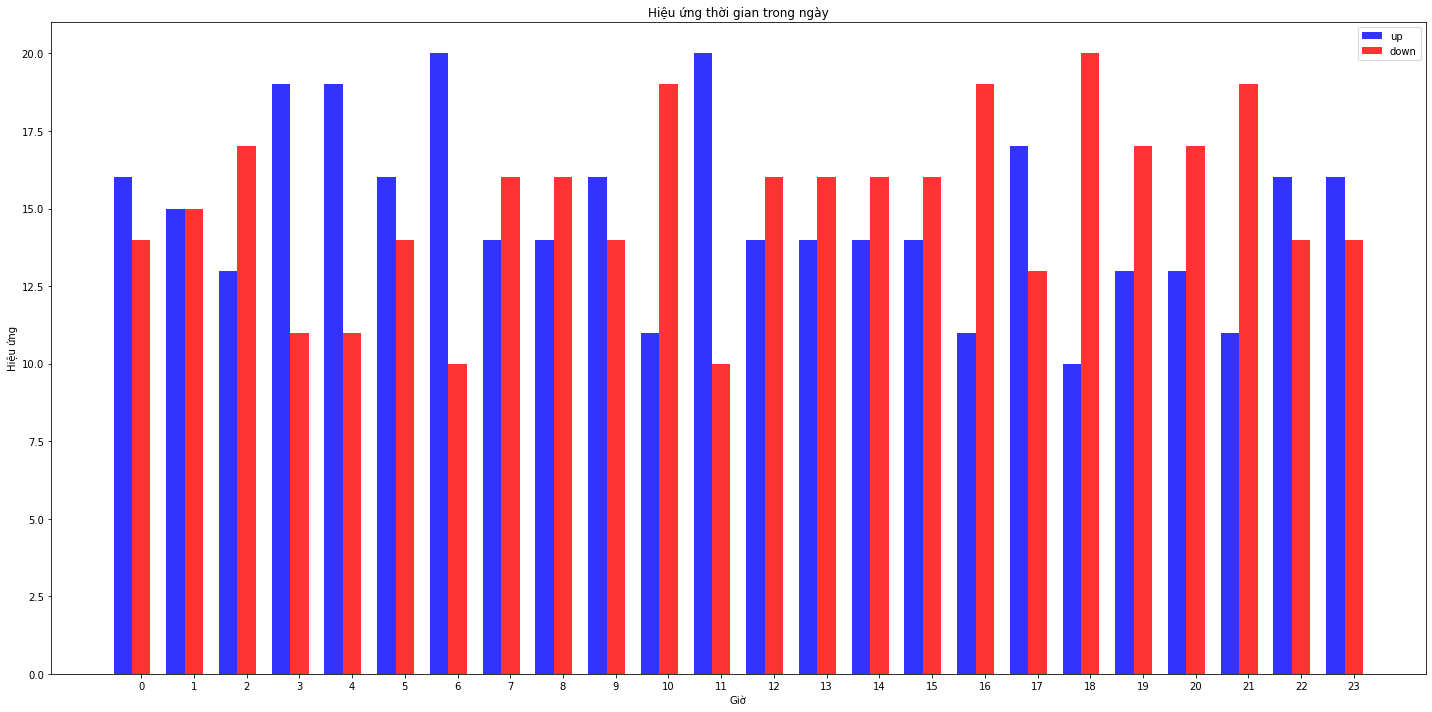

In [3]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*30, "DESC", '2021-6-1', '2021-6-30')

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices = data_prices[data_prices['hour'] == 10]

# number_up = len(data_prices[data_prices['type'] == 'up'])
# number_down = len(data_prices[data_prices['type'] == 'down'])

# print(number_up)
# print(number_down)

print(data_prices)

bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


# x = data_prices[data_prices['hour'] == 13]


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]
    # print(f"Giờ {i}")
    # print("________________________________")
    # print(data_prices_x[data_prices_x['type'] == 'up']['hour_return'].describe())
    # print("+++")
    # print(data_prices_x[data_prices_x['type'] == 'down']['hour_return'].describe())
    # data_prices[data_prices['hour'] == i]['hour_return'].plot(figsize=[20,10], legend=True, linestyle='--', marker='o')


    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()






type_continuous
0     371
2     181
3      81
4      38
5      27
6      13
7       5
8       2
9       1
10      1
dtype: int64


<Figure size 720x720 with 0 Axes>

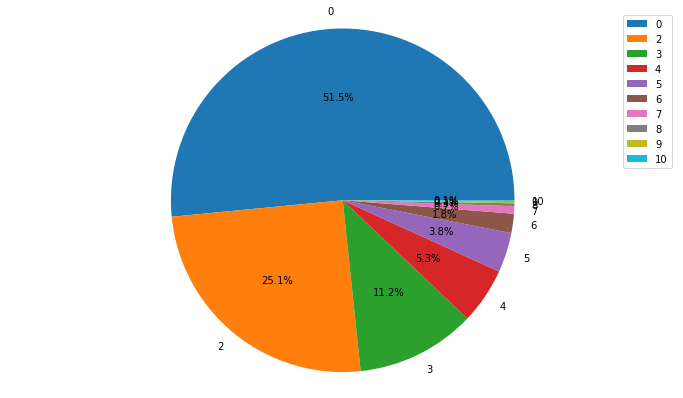

In [120]:
# data_prices['type_continuous'].hist(bins=20)

type_continuous_group = data_prices.groupby(['type_continuous']).size()

print(type_continuous_group)

# for index, value in type_continuous_group.iteritems():
#     print(f"{index} - {value}")


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()


Giờ 20
________________________________
count    4.000000
mean     0.512715
std      0.212318
min      0.319659
25%      0.358725
50%      0.472930
75%      0.626920
max      0.785340
Name: hour_return, dtype: float64
2.050859291263948
+++
count    3.000000
mean    -0.397754
std      0.202636
min     -0.615700
25%     -0.489103
50%     -0.362506
75%     -0.288780
max     -0.215054
Name: hour_return, dtype: float64
-1.19326059592929
___________________________**KÊT QUẢ**___________________________
Tỉ lệ up/down: open               4
high               4
close              4
low                4
hour_return        4
day                4
hour               4
type               4
type_continuous    4
dtype: int64 - open               3
high               3
close              3
low                3
hour_return        3
day                3
hour               3
type               3
type_continuous    3
dtype: int64
Tổng up = 2.050859291263948
Tổng down = -1.19326059592929


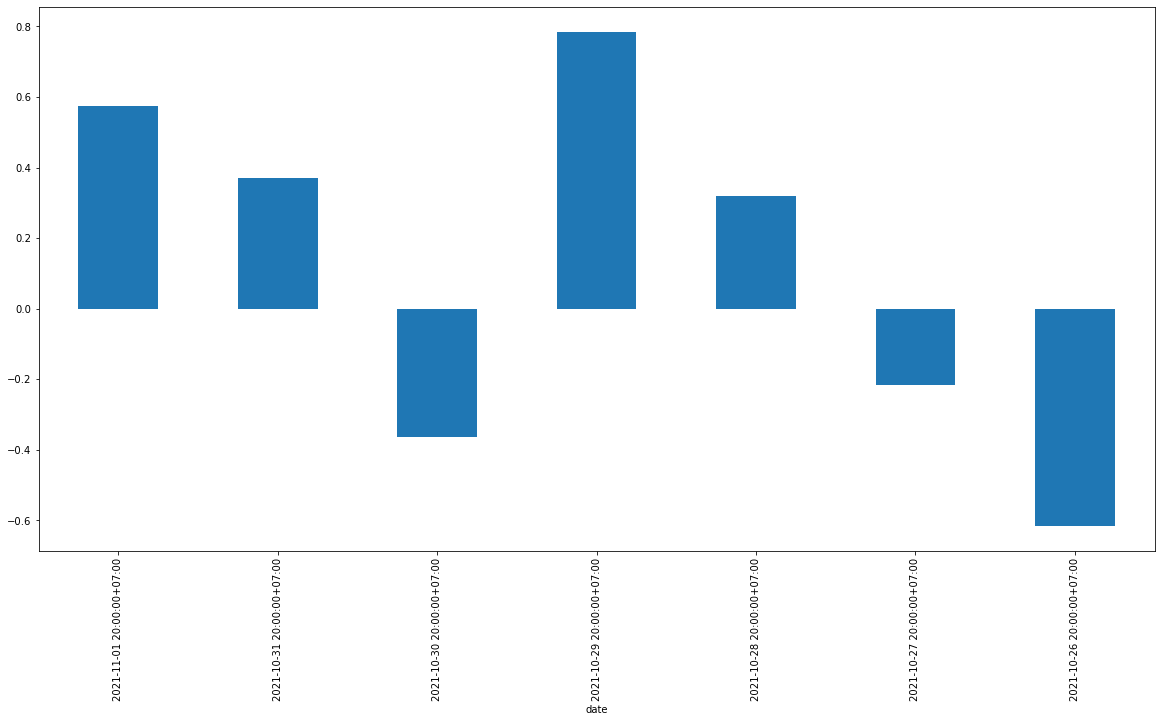

In [138]:
hour_observe = 20

data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

print(f"Giờ {hour_observe}")
print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')
# data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

print("___________________________**KÊT QUẢ**___________________________")
print(f"Tỉ lệ up/down: {data_prices_up.count()} - {data_prices_down.count()}")
print(f"Tổng up = {data_prices_up['hour_return'].sum()}")
print(f"Tổng down = {data_prices_down['hour_return'].sum()}")

<AxesSubplot:xlabel='date'>

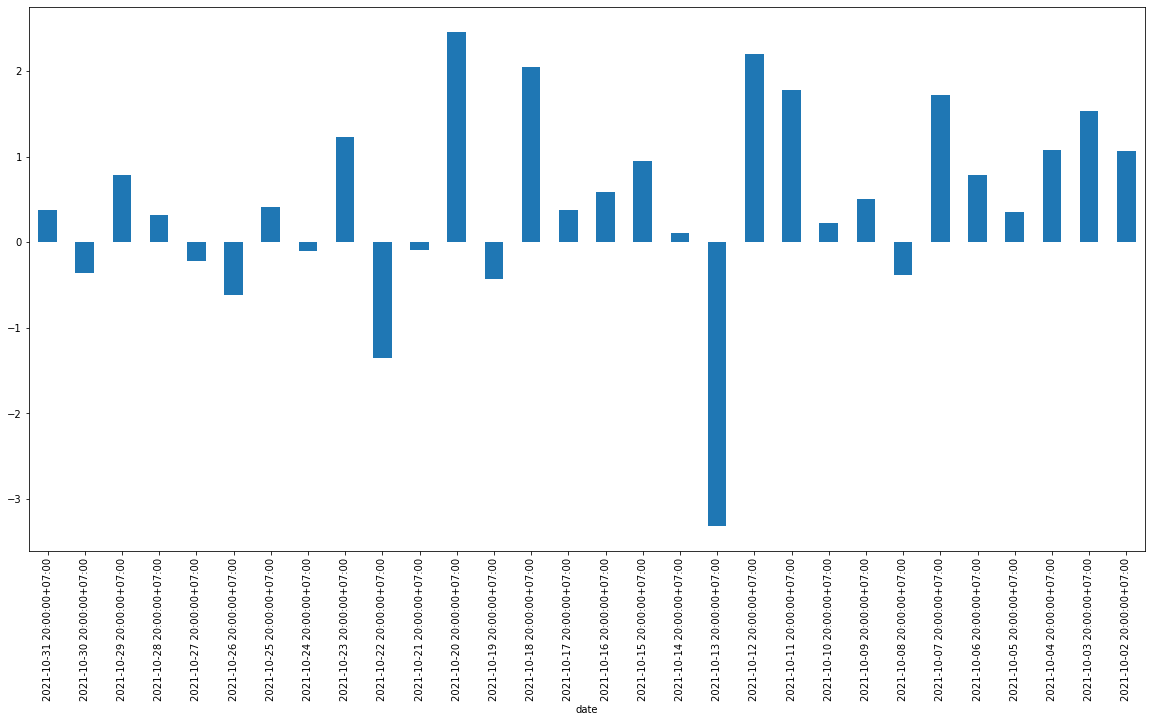

In [122]:
hour_observe = 20

data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')

<AxesSubplot:>

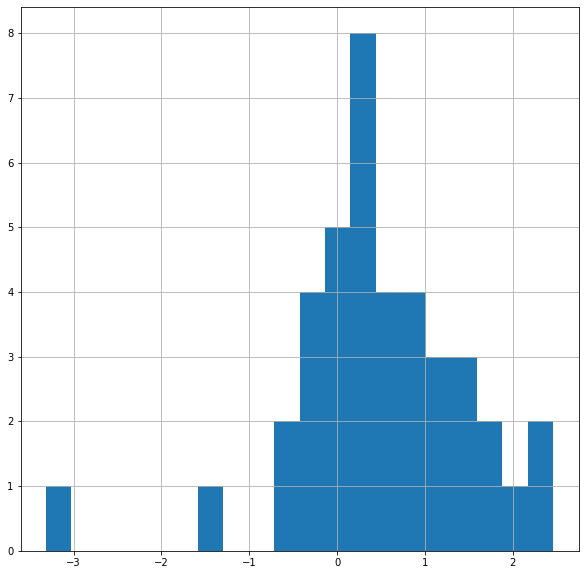

In [102]:
data_prices[data_prices['hour'] == hour_observe]['hour_return'].hist(bins=20)

In [13]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


,open,high,close,low,hour_return,day,hour,type,highest_in_day
date,,,,,,,,,
2021-10-06 19:00:00+07:00,166.6,177.8,177.1,166.4,6.302521,2021-10-06,19,up,19


In [123]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



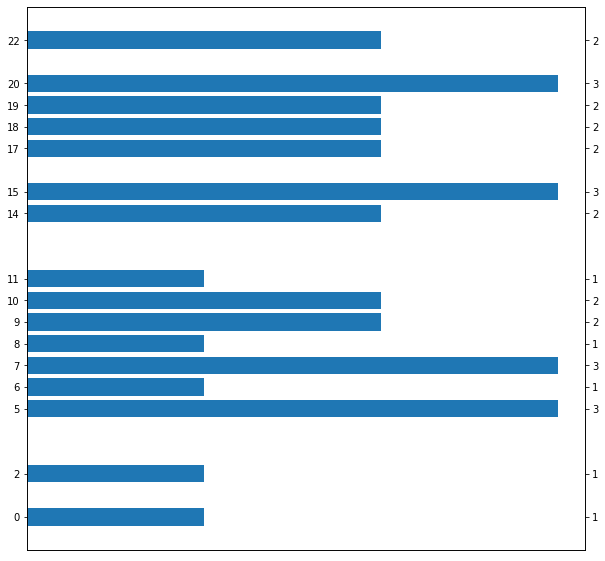

In [124]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()




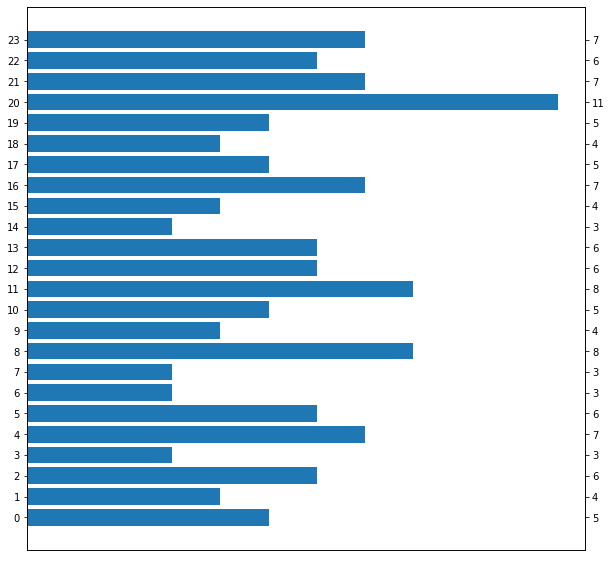

In [84]:
hour_observe = 20
type_observe = 'down'

data_prices_h7 = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == type_observe)]

hour_correlate = {
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0,
    '10': 0,
    '11': 0,
    '12': 0,
    '13': 0,
    '14': 0,
    '15': 0,
    '16': 0,
    '17': 0,
    '18': 0,
    '19': 0,
    '20': 0,
    '21': 0,
    '22': 0,
    '23': 0
}

for value in data_prices_h7['day'].to_list():
    for i in np.arange(24):
        if i == hour_observe:
            continue;
        hour_type = data_prices[(data_prices['day']  == value) & (data_prices['hour'] == i)].type

        if hour_type.values.size > 0 and hour_type.values == [type_observe]:
            hour_correlate[f"{i}"] = hour_correlate[f"{i}"] + 1
            
hour_correlate[f"{hour_observe}"] = len(data_prices_h7)

list_hours = [int(hour) for hour in hour_correlate.keys()]
list_correlate = hour_correlate.values()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_correlate, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_correlate)

plt.show()



In [134]:
hour_observe = 20

data_prices_20 = data_prices[(data_prices['hour'] == hour_observe)]


data_prices_20['type_continuous_20'] = type_continuous(data_prices_20)

print(data_prices_20)




                             open    high   close     low  hour_return  \
date                                                                     
2021-10-31 20:00:00+07:00  188.30  189.80  189.00  186.70     0.371747   
2021-10-30 20:00:00+07:00  193.10  194.10  192.40  191.00    -0.362506   
2021-10-29 20:00:00+07:00  191.00  192.70  192.50  190.20     0.785340   
2021-10-28 20:00:00+07:00  187.70  189.30  188.30  187.00     0.319659   
2021-10-27 20:00:00+07:00  186.00  186.60  185.60  185.20    -0.215054   
...                           ...     ...     ...     ...          ...   
2021-07-08 20:00:00+07:00  130.10  130.31  129.24  128.78    -0.661030   
2021-07-07 20:00:00+07:00  141.91  142.10  141.85  141.22    -0.042280   
2021-07-06 20:00:00+07:00  139.14  139.30  138.34  137.55    -0.574960   
2021-07-05 20:00:00+07:00  135.80  137.18  136.56  135.69     0.559647   
2021-07-04 20:00:00+07:00  142.86  147.15  145.52  142.86     1.861963   

                                  day

/var/folders/fp/s6k7vdqs42s7qjyh8ylyfv840000gn/T/ipykernel_41326/812859281.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_20['type_continuous_20'] = type_continuous(data_prices_20)


type_continuous_20
0    49
2    29
3    18
4     9
5     8
6     3
7     2
8     1
9     1
dtype: int64


<Figure size 720x720 with 0 Axes>

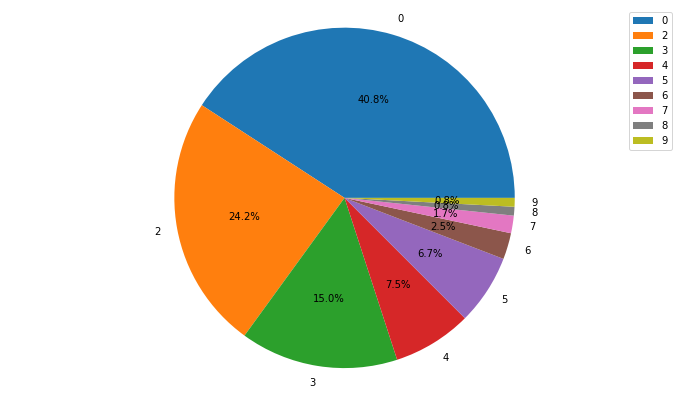

In [135]:
type_continuous_group = data_prices_20.groupby(['type_continuous_20']).size()

print(type_continuous_group)

# for index, value in type_continuous_group.iteritems():
#     print(f"{index} - {value}")


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()
